In [ ]:
# Weiling Li (wel4007@med.cornell.edu)
# Figures for ISMB 2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
###### Figure 1 ######

In [2]:
def percentileID(sortTPM_index):# sampleTPM: PM1640protein, sortTPM_index: PM1640_sortindex
    percentiles = []
    for i in range(0,10):
        start = round(len(sortTPM_index) * i/10)
        end = round(len(sortTPM_index) * (i+1)/10) -1
        #percentiles.append(sortTPM_index[start:end+1].values) # percentile
        percentiles.append(sortTPM_index[start:end+1]) # further percentile
    return percentiles


In [ ]:
# cov2kmat: generated by: python python/cov2k.py samplename
# fft2kmat: generated by: python python/fft2k.py samplename
# sl2kmat: generated by: python python/sl2k_190.py samplename

In [3]:
samplename = 'DTB-266-Baseline'
TPMmat = pd.read_csv('csv_files/rna.csv',sep='\t')[['GENE_ID','IDENTIFIER',samplename+'-cfDNA']]
cov2kmat = pd.read_csv(f'csv_files/results/{samplename}-cfDNAcov2k_bygene.csv')  # too big: in scratch
fft2kmat = pd.read_csv(f'csv_files/results/{samplename}-cfDNAfft2k_window190_bygene.csv')  # too big: in scratch
sl2kmat = pd.read_csv(f'csv_files/results/{samplename}-cfDNAsl2k_window190_bygene.csv')  # too big: in scratch

In [4]:
# remove NaN
sl2kmat=sl2kmat.dropna(axis=1, how='all')
intersection_set = set(TPMmat['GENE_ID']).intersection(set(sl2kmat.columns))
TPMmat2=TPMmat[TPMmat['GENE_ID'].isin(intersection_set)]
TPMmat2.index=TPMmat2['GENE_ID']
# sort 
TPMmatsorted=TPMmat2.iloc[np.flip(np.argsort(TPMmat2[samplename+'-cfDNA']))]
IDs=percentileID(TPMmatsorted.index)

Text(0, 0.5, 'Coverage')

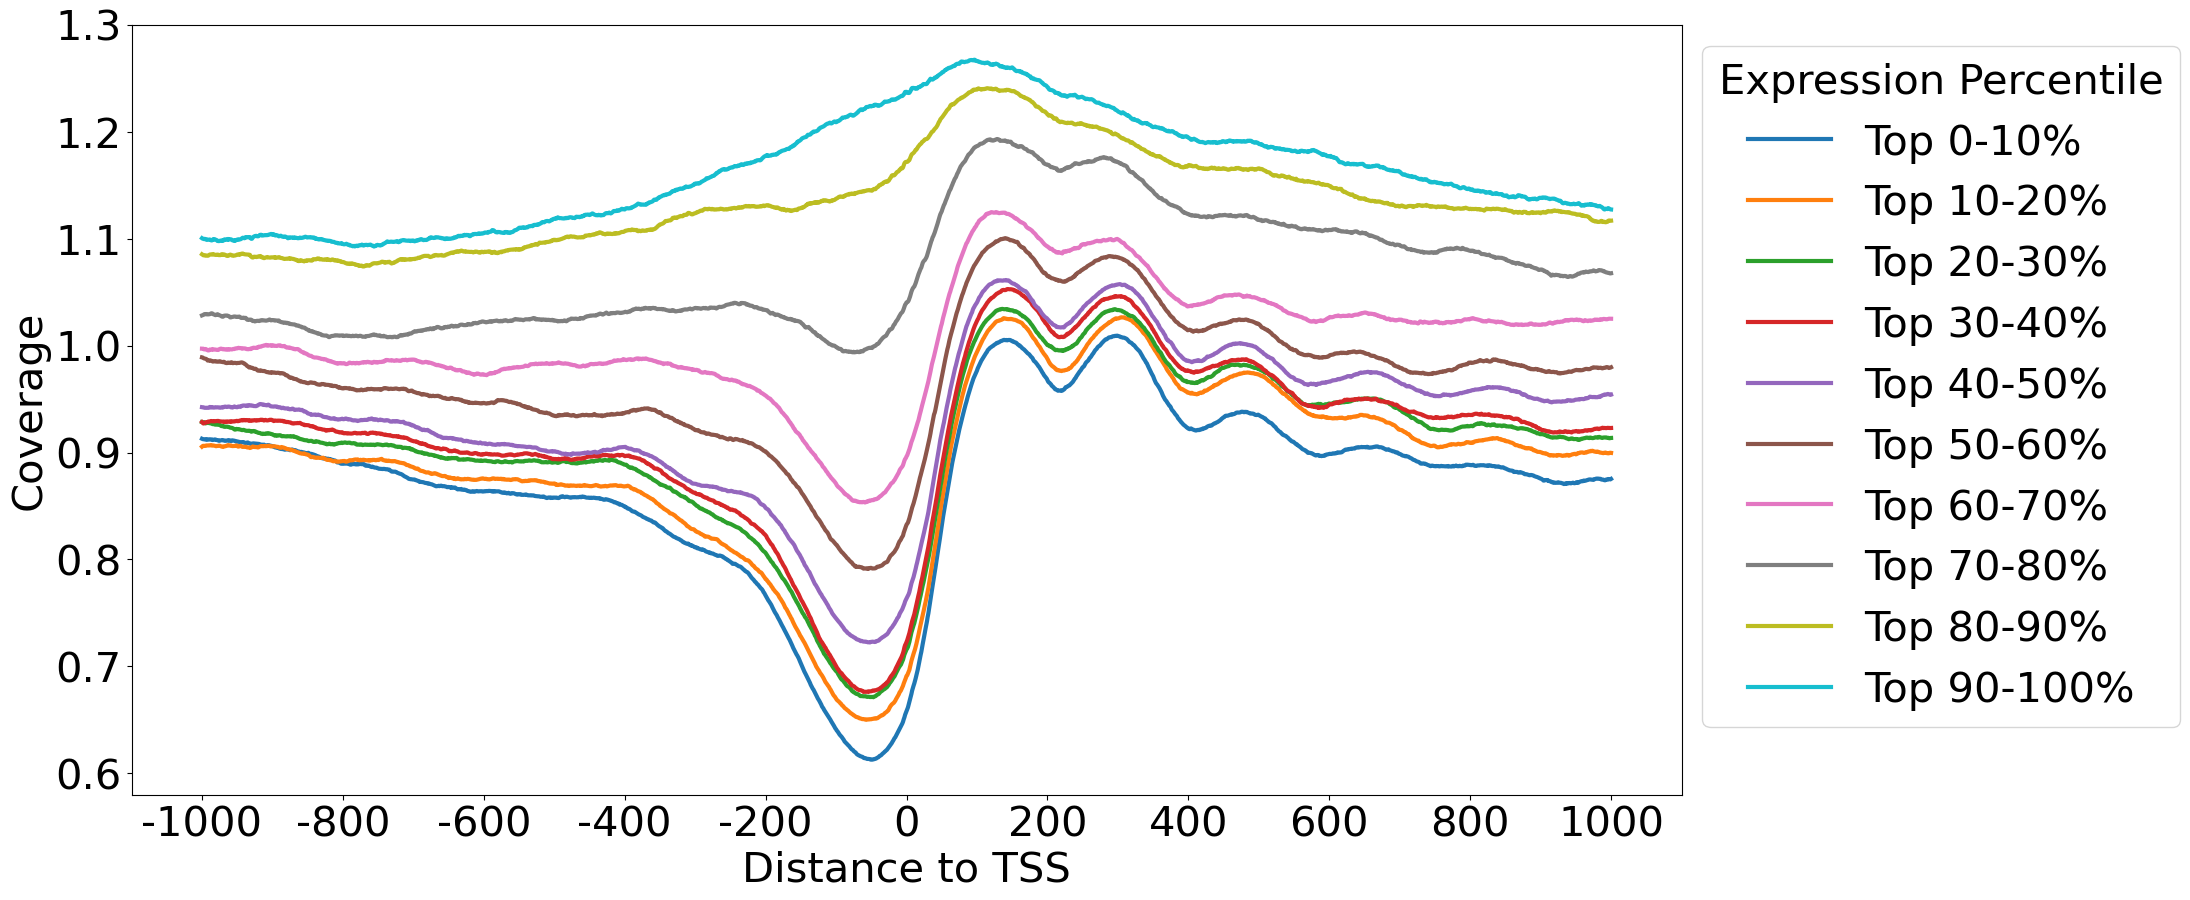

In [5]:
fig = plt.figure(figsize=(20,10))

for i in range(0,10):
    start = 1*i
    end = 1*(i+1)
 
    #a=[np.median(bp) for bp in cov2kmat[IDs[i].values]]
    a = cov2kmat[IDs[i].values].mean(axis=1)
    j=10*(i+1)
    j0=10*(i)
    s=f"Top {j0}-{j}"
    plt.plot(a, label= f'{s}%',linewidth=3)
plt.legend(fontsize=30,title='Expression Percentile', title_fontsize=30,bbox_to_anchor=(1, 1))
plt.xticks(range(0, 2100,200), range(-1000,1100,200))
plt.tick_params(axis="x", labelsize=30)#16) 
plt.tick_params(axis="y", labelsize=30)#16) 
plt.xlabel("Distance to TSS",fontsize=30)
plt.ylabel("Coverage",fontsize=30)

Text(0, 0.5, 'FFT-NPS')

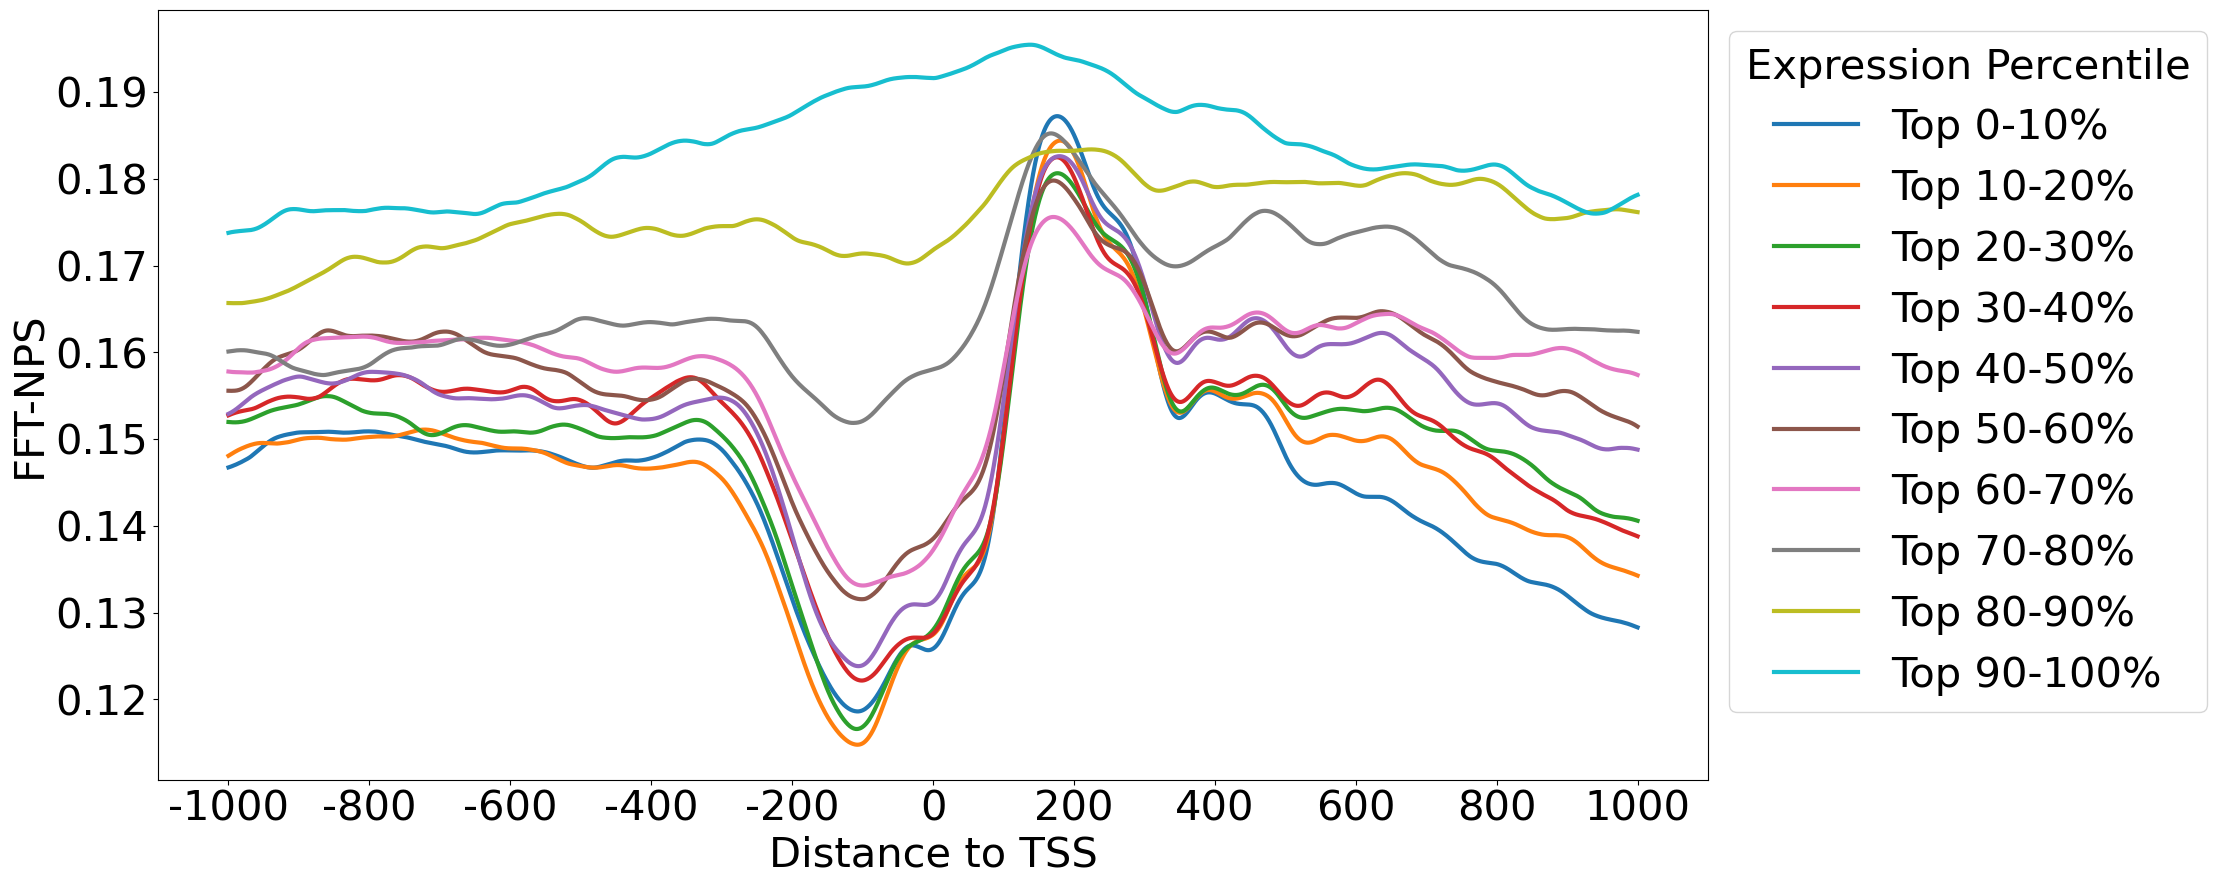

In [6]:
fig = plt.figure(figsize=(20,10))

for i in range(0,10):
    start = 1*i
    end = 1*(i+1)
 
    #a=[np.median(bp) for bp in cov2kmat[IDs[i].values]]
    a = fft2kmat[IDs[i].values].mean(axis=1)
    j=10*(i+1)
    j0=10*(i)
    s=f"Top {j0}-{j}"
    plt.plot(a, label= f'{s}%',linewidth=3)
plt.legend(fontsize=30,title='Expression Percentile', title_fontsize=30,bbox_to_anchor=(1, 1))
plt.xticks(range(0, 2100,200), range(-1000,1100,200))
plt.tick_params(axis="x", labelsize=30)#16) 
plt.tick_params(axis="y", labelsize=30)#16) 
plt.xlabel("Distance to TSS",fontsize=30)
plt.ylabel("FFT-NPS",fontsize=30)

Text(0, 0.5, 'S/L fragmentation ratio')

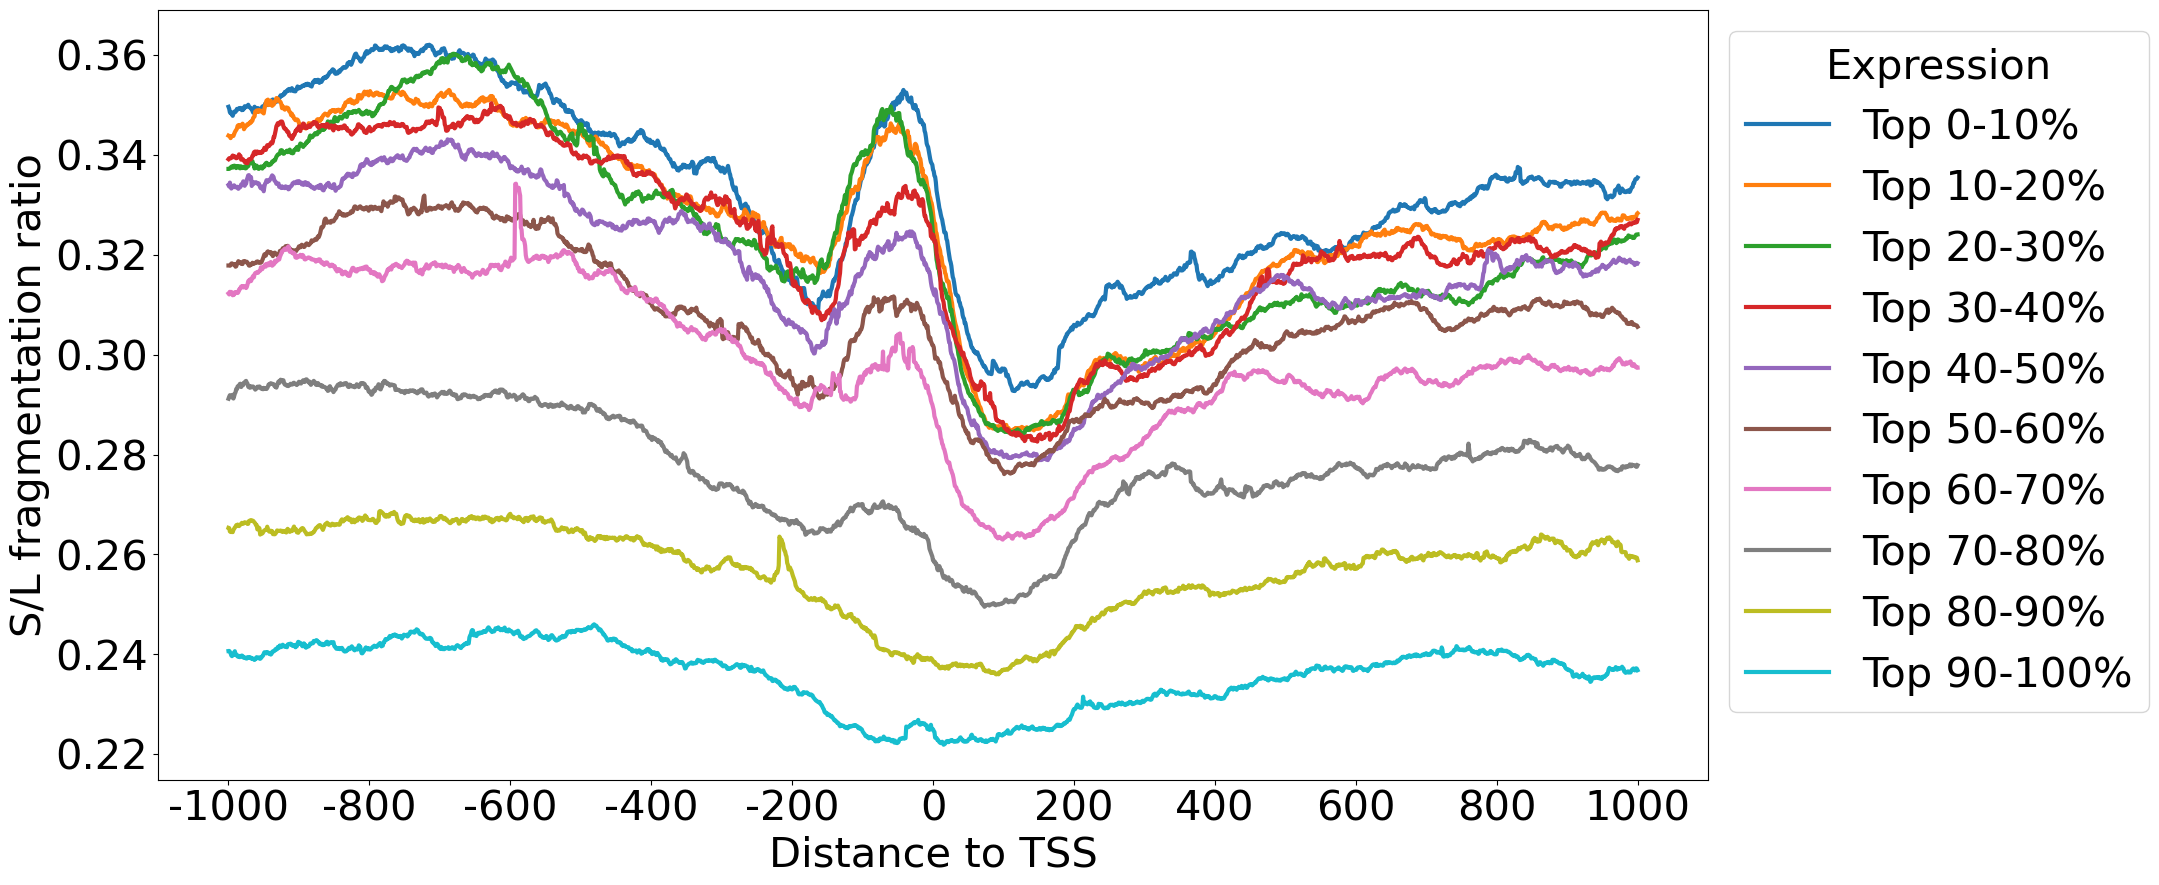

In [7]:
fig = plt.figure(figsize=(20,10))

for i in range(0,10):
    start = 1*i
    end = 1*(i+1)
 
    #a=[np.median(bp) for bp in cov2kmat[IDs[i].values]]
    a = sl2kmat[IDs[i].values].mean(axis=1)
    j=10*(i+1)
    j0=10*(i)
    s=f"Top {j0}-{j}"
    plt.plot(a, label= f'{s}%',linewidth=3)
plt.legend(fontsize=30,title='Expression', title_fontsize=30,bbox_to_anchor=(1, 1))
plt.xticks(range(0, 2100,200), range(-1000,1100,200))
plt.tick_params(axis="x", labelsize=30)#16) 
plt.tick_params(axis="y", labelsize=30)#16) 
plt.xlabel("Distance to TSS",fontsize=30)
plt.ylabel("S/L fragmentation ratio",fontsize=30)

In [8]:
bigmat=pd.read_csv(f'csv_files/results/{samplename}-cfDNAbigmat_withTPM.csv')
bigmat.index=bigmat['gene_id']
# simpson entropy
mydf=pd.DataFrame()
for i in range(0,10):
    new_df = pd.DataFrame([bigmat.loc[IDs[i].values]['meansimpson1k'].values])
    mydf = pd.concat([mydf, new_df], axis=0, ignore_index=True)

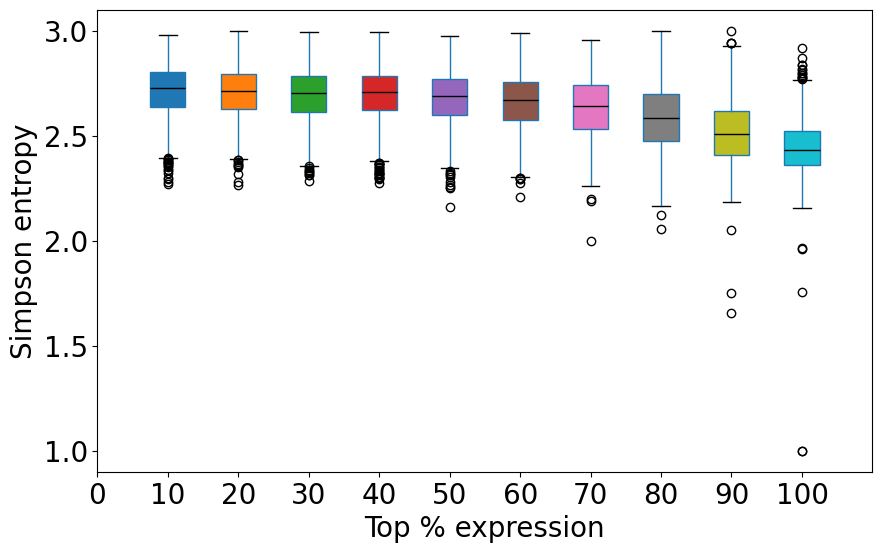

In [9]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# Boxplot with custom colors
box = mydf.T.boxplot(patch_artist=True, return_type='dict', figsize=(10, 6) ,medianprops={'linestyle': '-', 'color': 'black'})

# Apply colors to boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.grid(False)
plt.xlim(0,11)
plt.xticks(range(0, 11, 1), range(0,110,10))
plt.xlabel('Top % expression',fontsize=20)
plt.ylabel('Simpson entropy',fontsize=20)
plt.tick_params(axis="x", labelsize=20)#16) 
plt.tick_params(axis="y", labelsize=20)#16) 

In [ ]:
###### Figure 3 ######

/home/fs01/wel4007/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10')])

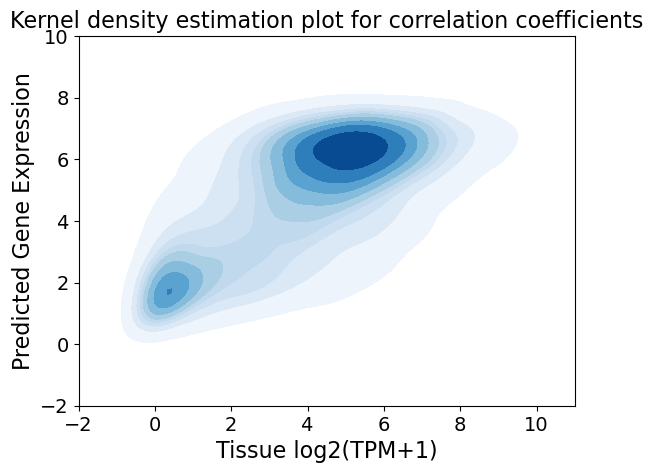

In [10]:
mat=pd.read_csv(f'csv_files/prediction/{samplename}-cfDNA_pred.csv') 
import seaborn as sns
sns.kdeplot(np.log2(mat['TPM']+1), mat['Prediction'],cmap='Blues',  # Color map
    fill=True)
plt.xlabel('Tissue log2(TPM+1)',fontsize=16)
plt.ylabel('Predicted Gene Expression',fontsize=16)
plt.title('Kernel density estimation plot for correlation coefficients',fontsize=16)
plt.xlim(-2, 11) 
plt.ylim(-2, 10) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Density Plot (DTB-183-Baseline, TFx=0.2895)')

In [ ]:
###### Figure 4 ######

In [11]:
comparison = pd.read_csv('csv_files/results/results.csv')
comparison['Sample']=['DTB097P','DTB102P','DTB119P','DTB149B','DTB156B','DTB183B','DTB205B','DTB210B','DTB214B','DTB216P','DTB258B','DTB261B','DTB266B']

star_indices=['DTB149B','DTB258B','DTB266B'] # epicseq_by1: not sufficient prediction results
submat=comparison[comparison['Sample'].isin(star_indices)]
othermat = comparison[~comparison['Sample'].isin(star_indices)]

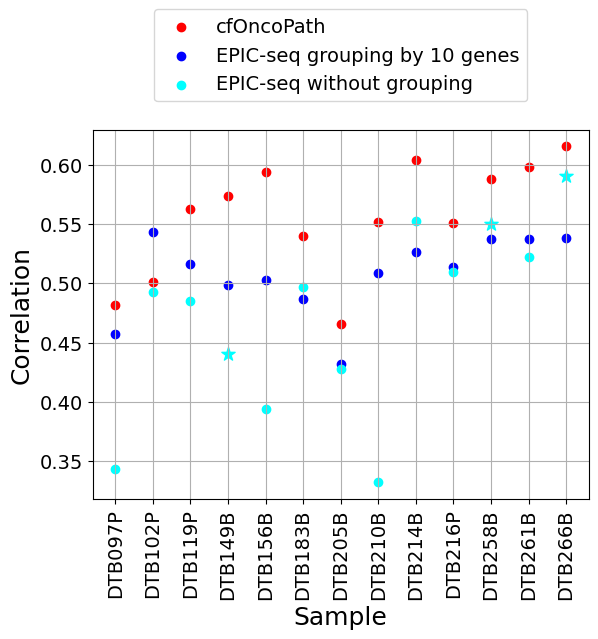

In [12]:
plt.scatter(comparison['Sample'], comparison['cfOncoPath'], label='cfOncoPath',color='red', marker='o')
plt.scatter(comparison['Sample'], comparison['epicseq_by10'], label='EPIC-seq grouping by 10 genes',color='blue', marker='o')
plt.scatter(othermat['Sample'],othermat['epicseq_by1'], label='EPIC-seq without grouping',color='cyan', marker='o')
plt.scatter(submat['Sample'],submat['epicseq_by1'],marker='*',color='cyan',s=100)


#plt.legend(fontsize=14, title_fontsize=20,loc='upper',bbox_to_anchor=(1, 1))
plt.xlabel('Sample',fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
# Place the legend above the plot
plt.legend(loc='lower center',fontsize=14, bbox_to_anchor=(0.5, 1.05), ncol=1)
plt.grid(True)
plt.show()
# for tf in comparison['TFx']:
#     plt.axvline(x=tf, color='grey', linestyle='--')

In [ ]:
###### Figure 5 ######

In [ ]:
# correlation_mat for heatmap:
# python python/heatmapcorrelation.py
# python python/heatmapepicseqcorrelation.py

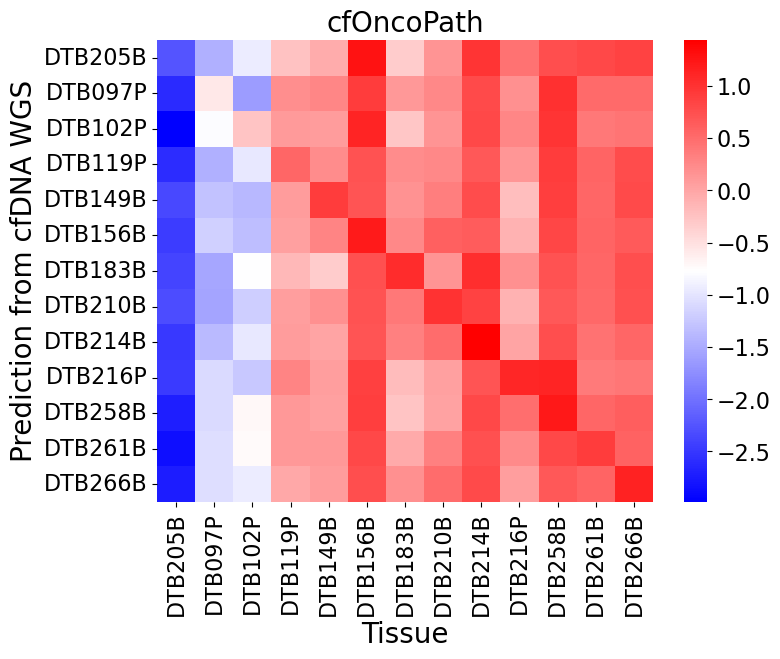

In [13]:
mymat=pd.read_csv('csv_files/results/correlation.final.csv',header=None) #x: TPM, y=pred
#names=['DTB-205-Baseline-cfDNA','DTB-097-Progression-cfDNA','DTB-102-Progression-cfDNA','DTB-119-Progression-cfDNA','DTB-149-Baseline-cfDNA','DTB-156-Baseline-cfDNA','DTB-183-Baseline-cfDNA','DTB-210-Baseline-cfDNA','DTB-214-Baseline-cfDNA','DTB-216-Progression-cfDNA','DTB-258-Baseline-cfDNA','DTB-261-Baseline-cfDNA','DTB-266-Baseline-cfDNA']
names=['DTB205B','DTB097P','DTB102P','DTB119P','DTB149B','DTB156B','DTB183B','DTB210B','DTB214B','DTB216P','DTB258B','DTB261B','DTB266B']
mymat.index=names
mymat.columns=names
zscore_df = mymat.apply(zscore, axis=1)
fig, ax = plt.subplots(figsize=(8,6))  
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('blue_white_red', ['blue','white',  'red'])

sns.heatmap(zscore_df, cmap=cmap, xticklabels=True, yticklabels=True,annot_kws={"size": 20})#'Blues'
# Adjust the color bar (legend) size
colorbar = plt.gca().collections[0].colorbar  # Get the colorbar associated with the heatmap

# Adjust the font size of the colorbar tick labels
colorbar.ax.tick_params(labelsize=16)  # Change tick label font size

# Adjust the colorbar label size
#colorbar.set_label('Colorbar Label', fontsize=16)  # Adjust label font size

# Show the plot

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 
plt.title('cfOncoPath',fontsize=20)
plt.xlabel('Tissue',fontsize=20)
plt.ylabel('Prediction from cfDNA WGS',fontsize=20)

plt.show()

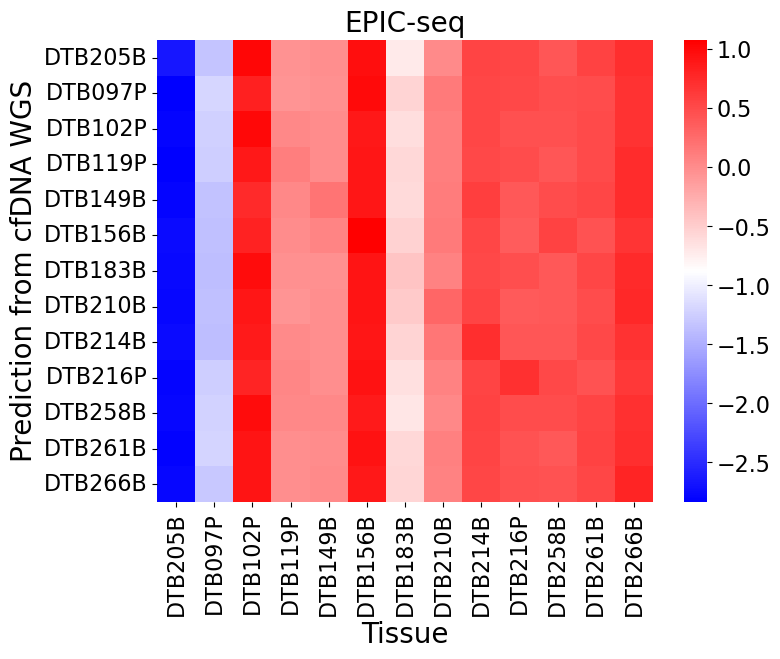

In [14]:
mymat=pd.read_csv('csv_files/results/epicseqcorrelation.final.csv',header=None) #x: TPM, y=pred
#names=['DTB-205-Baseline-cfDNA','DTB-097-Progression-cfDNA','DTB-102-Progression-cfDNA','DTB-119-Progression-cfDNA','DTB-149-Baseline-cfDNA','DTB-156-Baseline-cfDNA','DTB-183-Baseline-cfDNA','DTB-210-Baseline-cfDNA','DTB-214-Baseline-cfDNA','DTB-216-Progression-cfDNA','DTB-258-Baseline-cfDNA','DTB-261-Baseline-cfDNA','DTB-266-Baseline-cfDNA']
names=['DTB205B','DTB097P','DTB102P','DTB119P','DTB149B','DTB156B','DTB183B','DTB210B','DTB214B','DTB216P','DTB258B','DTB261B','DTB266B']
mymat.index=names
mymat.columns=names
zscore_df = mymat.apply(zscore, axis=1)
fig, ax = plt.subplots(figsize=(8,6))  
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('blue_white_red', ['blue','white',  'red'])

sns.heatmap(zscore_df, cmap=cmap, xticklabels=True, yticklabels=True,annot_kws={"size": 20})#'Blues'
# Adjust the color bar (legend) size
colorbar = plt.gca().collections[0].colorbar  # Get the colorbar associated with the heatmap

# Adjust the font size of the colorbar tick labels
colorbar.ax.tick_params(labelsize=16)  # Change tick label font size

# Adjust the colorbar label size
#colorbar.set_label('Colorbar Label', fontsize=16)  # Adjust label font size

# Show the plot

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 
plt.title('EPIC-seq',fontsize=20)
plt.xlabel('Tissue',fontsize=20)
plt.ylabel('Prediction from cfDNA WGS',fontsize=20)

plt.show()

In [ ]:
###### Figure 7 ######

In [ ]:
# power calculation: python python/powercalc.py

Text(0, 0.5, 'patient group size')

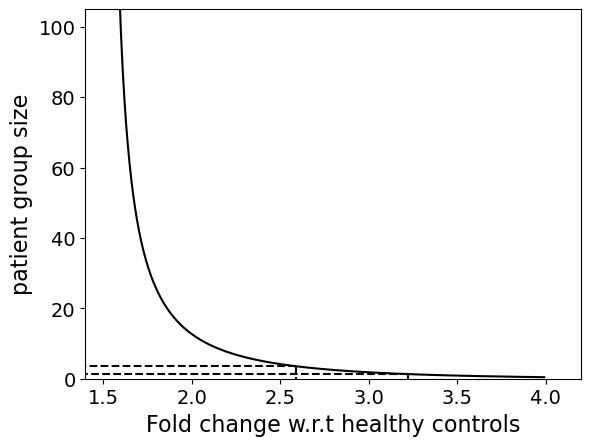

In [15]:
mat1=pd.read_csv('csv_files/results/fc_1_5.AR.powercalcfinal.txt')
# 9.61140077305643,(3.537465641357079+0j),2.59
# 25.8337787548802,(1.3161063397888375+0j),3.22
sub1=mat1[(mat1['FoldChange']>1.58) & (mat1['FoldChange']<4)]
size1,fcs1=[],[]
for k in sub1['K']: 
    size1.append(34/float(k))
for f in sub1['FoldChange']:
    fcs1.append(float(f))
plt.plot(fcs1,size1,color='black')
plt.xlim(1.4, 4.2) 
plt.ylim(0, 105) 
#plt.axvline(x=.5, linestyle='--', ymin=0.25, ymax=0.75)
x1, y1 = 2.59, 3.537465641357079  # Point AR coordinates, y1 from fc_1_5.AR.powercalcfinal.txt
x2, y2 = plt.xlim()[0], y1 
x3, y3 = x1, plt.ylim()[0] 


# Draw a line between the points
plt.plot([x1, x2], [y1, y2], linestyle='--',color='black')
plt.plot([x1, x3], [y1, y3], linestyle='--',color='black')

xx1,yy1 = 3.22, 1.3161063397888375  # Point NE coordinates, yy1 from fc_1_5.AR.powercalcfinal.txt
xx2, yy2 = plt.xlim()[0], yy1  
xx3, yy3 = xx1, plt.ylim()[0] 
# 2.5939177897765813
# 3.220350041070553

# Draw a line between the points
plt.plot([xx1, xx2], [yy1, yy2], linestyle='--',color='black')
plt.plot([xx1, xx3], [yy1, yy3], linestyle='--',color='black')


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Fold change w.r.t healthy controls', fontsize=16)
plt.ylabel('patient group size', fontsize=16)
